In [1]:
import os
import shutil
import pandas as pd
import random
import glob
from PIL import Image
import matplotlib.pyplot as plt
import re
from joblib import Parallel , delayed
import numpy as np

In [2]:
# Clothing categories in Deepfashion Dataset for men
os.listdir('/Users/mananmehta/Desktop/fashion/triplet approach/DeepFashion/img/CLOTHING')

['.DS_Store',
 'Blouse',
 'Coat',
 'Jeans',
 'Pants',
 'Polo_Shirt',
 'Summer_Wear',
 'T_Shirt',
 'Tank_Top']

In [9]:
# list_bbox_consumer2shop copy.txt --> contains 'file_path' and corresponding 'bounding box coordinates'
with open('/Users/mananmehta/Desktop/fashion/triplet approach/DeepFashion/Anno/list_bbox_consumer2shop copy.txt','r') as f:
    lines = f.readlines()

# Creating CSV file    
csv = []
for line in lines:
    csv.append((',').join([c for c in line.split(' ') if c is not '']))
    
csv = (',').join(csv)

# Saving as bbox.csv
with open('./bbox.csv','w') as f:
    f.write(csv)
    
# Example
data = pd.read_csv('./bbox.csv')
data.head()

,image_name,clothes_type,source_type,x_1,y_1,x_2,y_2
NaN,img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg,1,1,1,39,200,292
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,1,1,223,300
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,1,1,169,230
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,6,8,215,300
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,1,1,225,300


In [10]:
data['bbox'] = list(zip(data.x_1,data.y_1,data.x_2,data.y_2))

In [11]:
data.head()

,image_name,clothes_type,source_type,x_1,y_1,x_2,y_2,bbox
NaN,img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg,1,1,1,39,200,292,"(1, 39, 200, 292)"
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,1,1,223,300,"(1, 1, 223, 300)"
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,1,1,169,230,"(1, 1, 169, 230)"
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,6,8,215,300,"(6, 8, 215, 300)"
NaN,img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...,1,2,1,1,225,300,"(1, 1, 225, 300)"


In [7]:
def sample_in_class(clothing,current_folder):
    ''' Function to Sample negatives from within class.
        If my current query and positive samples are from T - Shirts
        folder then This function will return a random negative from T-Shirt folder'''
    
    folder = random.choice(os.listdir('img/CLOTHING/'+ clothing))
    while folder == current_folder  or folder == '.DS_Store':
        folder = random.choice(os.listdir('img/CLOTHING/'+ clothing))
    
    return clothing + '-' + folder + '-' + random.choice(os.listdir('img/CLOTHING/'+ clothing + '/' + folder)) + ',\n'
    
out_classes = ['Blouse','Coat','Jeans','Pants','Polo_Shirt', 'Summer_Wear', 'T_Shirt', 'Tank_Top']
def sample_out_class(clothing):
    ''' Function to Sample negatives from outside class.
        If my current query and positive samples are from T - Shirts
        folder then This function will return a random negative from any of the other classes 
        other than T - Shirts i.e ['Blouse','Coat','Jeans','Pants','Polo_Shirt', 'Summer_Wear', 'Tank_Top']'''
    clothing_class = random.choice(out_classes)
    while clothing_class == clothing:
        clothing_class = random.choice(out_classes)
    
    folder  = random.choice(os.listdir('img/CLOTHING/' + clothing_class))
    while folder == '.DS_Store':
        folder  = random.choice(os.listdir('img/CLOTHING/' + clothing_class))

    return clothing_class + '-' + folder + '-' + random.choice(os.listdir('img/CLOTHING/' + clothing_class + '/' + folder)) + ',\n'
    

In [204]:
# example of of triplets.csv would look like 
classes = ['Polo_Shirt', 'Summer_Wear', 'T_Shirt', 'Tank_Top']
count = 0
for cls in classes:
        img_path = 'img/CLOTHING/'+ cls + '/'
        
        for folder in os.listdir(img_path):
            
            if folder.startswith('.'):
                continue
            
            # within a folder
            consumer = [ f for f in os.listdir( img_path + folder ) if f.startswith('c')]
            shop =  [f for f in os.listdir( img_path + folder ) if f.startswith('s')]
            #print(shop)
            consumer_shop_pairs = [ cls + '-' + folder+ '-' + c + ',' + cls + '-' + folder + '-'  + s for c in consumer for s in shop]           
            for pair in consumer_shop_pairs:
                for i in range(5):
                    if i < 3:
                        print(pair + ',' + sample_in_class(cls,folder),end = '\n\n')
                    else:
                        print(pair + ',' + sample_out_class(cls),end = '\n\n')
                break       
            break    

Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Polo_Shirt-id_00009038-shop_01.jpg,

Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Polo_Shirt-id_00024210-shop_01.jpg,

Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Polo_Shirt-id_00018533-shop_01.jpg,

Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,T_Shirt-id_00018244-comsumer_10.jpg,

Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Jeans-id_00026766-shop_01.jpg,

Summer_Wear-id_00011203-comsumer_01.jpg,Summer_Wear-id_00011203-shop_01.jpg,Summer_Wear-id_00018861-shop_01.jpg,

Summer_Wear-id_00011203-comsumer_01.jpg,Summer_Wear-id_00011203-shop_01.jpg,Summer_Wear-id_00024993-shop_01.jpg,

Summer_Wear-id_00011203-comsumer_01.jpg,Summer_Wear-id_00011203-shop_01.jpg,Summer_Wear-id_00018799-comsumer_03.jpg,

Summer_Wear-id_00011203-comsumer_01.jpg,Summer_Wear-id_00011203-shop_01.jpg,Blouse-id_00024740-shop_01.

In [8]:
# Creating triplets from ['Polo_Shirt', 'Summer_Wear', 'T_Shirt', 'Tank_Top'] classes

classes = ['Polo_Shirt', 'Summer_Wear', 'T_Shirt', 'Tank_Top']
with open('triplets.csv','w') as f:
    f.write('query,positive,negative,\n')
    
    # Loop over each class
    for cls in classes:
        img_path = 'img/CLOTHING/'+ cls + '/'
        
        # Loop over each product folder
        for folder in os.listdir(img_path):
            
            if folder.startswith('.'):
                continue
            
            
            consumer = [f for f in os.listdir( img_path + folder ) if f.startswith('c')]  # Consumer_images
            shop =  [f for f in os.listdir( img_path + folder ) if f.startswith('s')]     # Shop_images
            # cartesian product of consumer x shop
            consumer_shop_pairs = [ cls + '-'+ folder + '-' + c + ',' + cls + '-' + folder + '-' + s for c in consumer for s in shop]
            # Creating 5 triplets for each consumer x shop pair
            # 3 in-class triplets + 2 out_class triplets
            for pair in consumer_shop_pairs:
                for i in range(5):
                    if i < 3:
                        f.write(pair + ',' + sample_in_class(cls,folder))
                    else:
                        f.write(pair + ',' + sample_out_class(cls))
            

In [12]:
triplets = pd.read_csv('triplets.csv')
triplets.head()

,query,positive,negative,Unnamed: 3
0,Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Polo_Shirt-id_00018529-comsumer_01.jpg,NaN
1,Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Polo_Shirt-id_00012508-comsumer_04.jpg,NaN
2,Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Polo_Shirt-id_00025592-comsumer_01.jpg,NaN
3,Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Coat-id_00028816-shop_01.jpg,NaN
4,Polo_Shirt-id_00006282-comsumer_01.jpg,Polo_Shirt-id_00006282-shop_01.jpg,Pants-id_00013826-shop_03.jpg,NaN


In [192]:
pattern = re.compile('img/CLOTHING/[A-Z_]+/id_\d+/c',re.IGNORECASE)
pattern.match('img/CLOTHING/Polo_Shirt/id_00006282/consumer_01.jpg')

<_sre.SRE_Match object; span=(0, 37), match='img/CLOTHING/Polo_Shirt/id_00006282/c'>

In [193]:
def cropped_images(sample, output_dir = '/Users/mananmehta/Desktop/triplets_cropped'):
    '''
    Function to create a new folder of cropped consumer images and uncropped shop images.
    Function takes one image - 
    consumer images are cropped
    shop images are copied as it is
    images will be stored in the path output_dir/clothing_class-product_id-image_name 
    '''
    img_path = sample[0]
    bbox_coordinates = sample[4]

    img_name = os.path.basename(img_path)
    dir_name = os.path.dirname(img_path).split('/')[-2:]
    dir_name = '-'.join(dir_name)
    output_path = os.path.join(output_dir,dir_name + '-' + img_name)

    if pattern.match(img_path):
        img = Image.open(img_path)
        img = img.crop(bbox)
        img.save(output_path)
    else:
        shutil.copy(img_path,output_path)

# cropped_images(bbox)

In [194]:
# Running Cropped images parallely on all men images in DeepFashion Dataset
Parallel(n_jobs = 32,verbose=10)(delayed(cropped_images)(f) for f in data.values if f[0].startswith('img/CLOTHING/'))

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    9.3s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    9.6s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=32)]: Done  49 tasks      | elapsed:    9.7s
[Parallel(n_jobs=32)]: Done  64 tasks      | elapsed:    9.8s
[Parallel(n_jobs=32)]: Done  81 tasks      | elapsed:    9.8s
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   10.0s
[Parallel(n_jobs=32)]: Done 117 tasks      | elapsed:   10.0s
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:   10.1s
[Parallel(n_jobs=32)]: Done 157 tasks      | elapsed:   10.2s
[Parallel(n_jobs=32)]: Done 178 tasks      | elapsed:   10.2s
[Parallel(n_jobs=32)]: Done 201 tasks      | elapsed:   10.3s
[Parallel(n_jobs=32)]: Batch computation too fast (0.1970s.) Setting batch_size=2.
[Parallel(n_jobs=32)]: Done 224 tasks      | elapsed:   10.4s
[Parallel(n_jobs=32)]: Done 249 ta

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

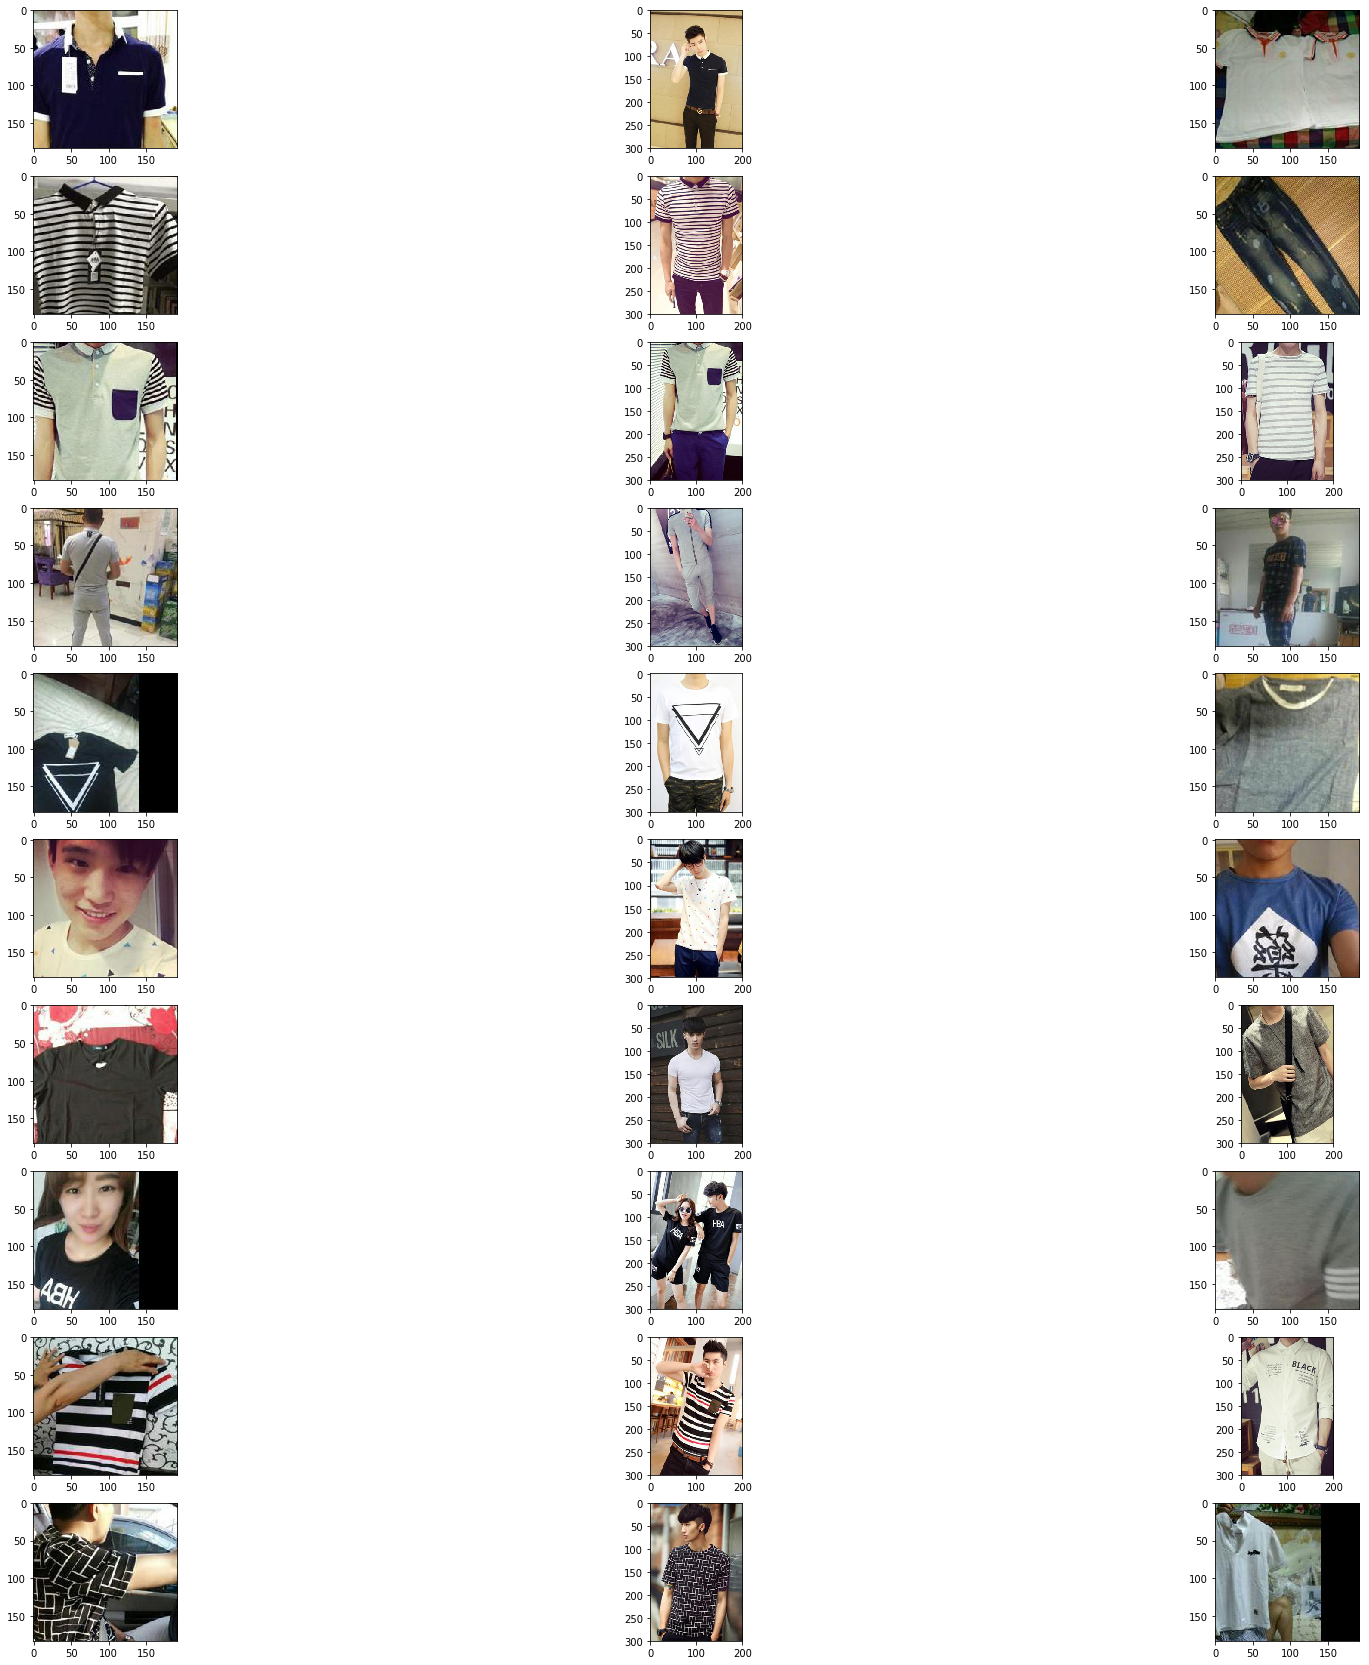

In [17]:
samples = triplets.values
fig = plt.figure(figsize = (30,30))
axes = []
c = 0
for i in range(10):
    n = np.random.randint(1,10000)
    sample = samples[n]
    axes.append(fig.add_subplot(10,3,i+c+1))
    img = Image.open('/Users/mananmehta/desktop/triplets_cropped/'+sample[0])
    plt.imshow(img)
    
    axes.append(fig.add_subplot(10,3,i+c+2))
    img = Image.open('/Users/mananmehta/desktop/triplets_cropped/'+sample[1])
    plt.imshow(img)
    
    axes.append(fig.add_subplot(10,3,i+c+3))
    img = Image.open('/Users/mananmehta/desktop/triplets_cropped/'+sample[2])
    plt.imshow(img)
    c = c+ 2

plt.show()    